In [18]:
# The most logical approach is using the the joeddav/xlm-roberta-large-xnli
# pretrained model, because it fits perfectly to our needs:
# a) Trained for NLI tasks on contradiction, entailment or neutral labels.
# b) Trained for several languages, perfect for our database.


# We will use this exercise to compare the results of:

# 1) Using the joeddav/xlm-roberta-large-xnli pretrained model
# without using the training database (we can do it because this model
# is spedifically pre-trained for xnli tasks)

# VS

# 2) Using the Using the joeddav/xlm-roberta-large-xnli pretrained model,
# fine-tuning it with the training database. We might have memory problems because
# transfer learning is highly resource-demanding if we use tensorflow and 
# we are going to try to train it using a GPU instead of a TPU. For the fine-tuning
# I relied on this example https://www.kaggle.com/nicovincx2/fine-tuning-gpu

In [19]:
# 1) PREDICTING WITHOUT FINETUNING (WE WILL NOT USE THE TRAIN DATABASE, WE WILL
# JUST RELY ON THE PRE-TRAINED MODEL):

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [20]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


In [21]:
train_df

# 0 == entailment, 1 == neutral, 2 == contradiction

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


In [22]:
test_df

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian
...,...,...,...,...,...
5190,5f90dd59b0,نیند نے وعدہ کیا کہ موٹل نے سوال میں تحقیق کی.,نیمیتھ کو موٹل کی تفتیش کے لئے معاوضہ دیا جارہ...,ur,Urdu
5191,f357a04e86,The rock has a soft texture and can be bough...,The rock is harder than most types of rock.,en,English
5192,1f0ea92118,她目前的存在，并考虑到他与沃佛斯顿争执的本质，那是尴尬的。,她在与Wolverstone的打斗结束后才在场的事实被看作是很尴尬的。,zh,Chinese
5193,0407b48afb,isn't it i can remember i've only been here ei...,I could see downtown Dallas from where I lived...,en,English


In [23]:
# Convert everything into lower case:

train_df['premise'] = train_df['premise'].str.lower()
train_df['hypothesis'] = train_df['hypothesis'].str.lower()
train_df

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,the rules developed in the interim were put to...,en,English,0
1,5b72532a0b,these are issues that we wrestle with in pract...,practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,des petites choses comme celles-là font une di...,j'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,they can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
12115,2b78e2a914,the results of even the most well designed epi...,all studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,but there are two kinds of the pleasure of do...,but there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,the important thing is to realize that it's wa...,"it cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,at the west end is a detailed model of the who...,the model temple complex is at the east end.,en,English,2


In [24]:
# We check that there are no null values

null_values_1 = train_df['premise'].isnull().values.sum()
null_values_2 = train_df['hypothesis'] .isnull().values.sum()

In [25]:
null_values_1

0

In [26]:
null_values_2

0

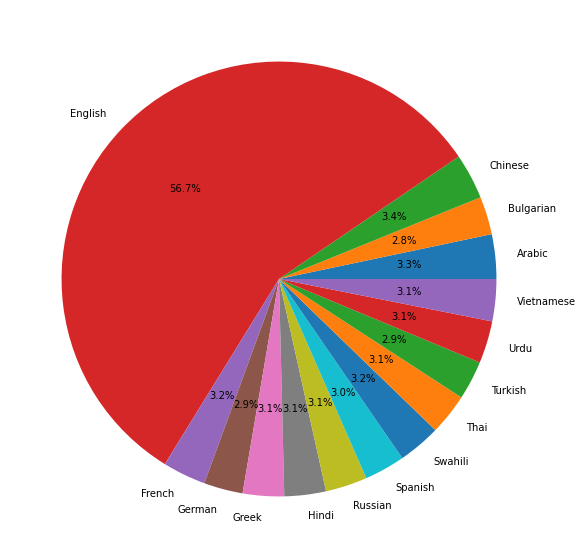

In [27]:
# We check languages:

labels, frequencies = np.unique(train_df.language.values, return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

In [28]:
# checking in "Files and versions" in hugging face we find the following info in config.json:
# "label2id": {"contradiction": 0, "neutral": 1, entailment": 2}
# In our train_df we have: "entailment": 0, "neutral" : 1, "contradiction":2
# This is twisted. Therefore we need to make this change:

train_df['label'] = train_df['label'].replace([0, 2], [2, 0])

In [29]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
xlmr = AutoModelForSequenceClassification.from_pretrained('joeddav/xlm-roberta-large-xnli')
tokenizer = AutoTokenizer.from_pretrained('joeddav/xlm-roberta-large-xnli')

In [30]:
# We are going to use the train_df to evaluate, since the model is pretrained in NLI.
# Using all the values would be too long, so we just take the first 200 rows only
# to check is the model is giving coherent predictions. 

train_df = train_df.loc[0:200]

In [31]:
# First we tokenize

def get_tokens_xlmr_model(data):
    batch_tokens = []
    for i in range(len(data)):
        tokens = tokenizer.encode(data['premise'][i], data['hypothesis'][i], return_tensors='pt', truncation_strategy='only_first')
        batch_tokens.append(tokens)
    return batch_tokens

In [32]:
# And then we predict

def get_predicts_xlmr_model(tokens):
    batch_predicts = []
    for i in tokens:
        predict = xlmr(i)[0][0]
        predict = int(predict.argmax())
        batch_predicts.append(predict)
    return batch_predicts

In [33]:
sample_train_data_tokens = get_tokens_xlmr_model(train_df)

/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1796: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  FutureWarning,


In [34]:
sample_train_data_predictions = get_predicts_xlmr_model(sample_train_data_tokens)

In [35]:
sample_train_data_tokens

[tensor([[     0,    136,   6097,  24626,   3542,  90698,     23,  26168,   1916,
              70,   1940,    464,  91736,      5,      2,      2,     70,  91736,
          126809,     23,     70,   1940,    464,   3542,   3884,  25842,    678,
            6097,  24626,     23,   7086,      5,      2]]),
 tensor([[    0,  6097,   621, 37348,   450,   642,   148, 56644,   133,   678,
             23, 41361, 94407,   111, 27165, 11037,     7,     4,  2412,  2804,
              5,     2,     2, 41361, 94407,   621,   959, 28897,  3674,    47,
           4488,    98,  6097, 37348,     5,     2]]),
 tensor([[     0,    224,  69332,  37899,   3739,  91362,      9,  16161,  12401,
             773, 123683, 211033,    807,    405,     41,   1647,     25,   6011,
            1033,      8,   2973,      5,      2,      2,   1647,     25,   6011,
             395,    164,    104,     25,   2263,  58875,  23062,  38944,  19667,
               5,      2]]),
 tensor([[     0,    398,   3714,   1836,

Classification report : 
                precision    recall  f1-score   support

contradiction       0.94      0.92      0.93        64
      neutral       0.88      0.90      0.89        62
   entailment       0.95      0.93      0.94        75

     accuracy                           0.92       201
    macro avg       0.92      0.92      0.92       201
 weighted avg       0.92      0.92      0.92       201



/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


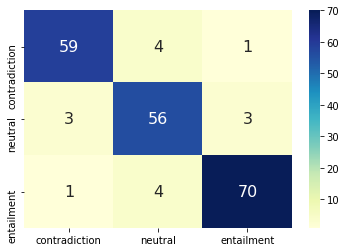

In [36]:
# For the accuracy we calculate the confusion matrix
# and we confirm that the results make sense:

import seaborn as sns
from sklearn.metrics import classification_report

train_df['label'] = train_df['label'].astype(str).astype(int)
x = np.array(train_df['label'])
y = np.array(sample_train_data_predictions)
cm = np.zeros((3, 3), dtype=int)
np.add.at(cm, [x, y], 1)
sns.heatmap(cm,cmap='YlGnBu', annot=True, annot_kws={'size':16}, fmt='g', xticklabels=['contradiction','neutral','entailment'], yticklabels=['contradiction','neutral','entailment'])
matrix = classification_report(x,y,labels=[0,1,2], target_names=['contradiction','neutral','entailment'])
print('Classification report : \n',matrix)



In [37]:
# Let's do our predictions over the test data set: 

In [38]:
sample_test_data_tokens = get_tokens_xlmr_model(test_df)

/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1796: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  FutureWarning,


In [39]:
sample_test_data_predictions = get_predicts_xlmr_model(sample_test_data_tokens)

In [40]:
sample_test_data_predictions

[0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 1,


In [60]:
results_df = pd.DataFrame (sample_test_data_predictions, columns = ['prediction'])

In [61]:
results_df

,prediction
0,0
1,1
2,2
3,1
4,1
...,...
5190,1
5191,0
5192,2
5193,2


In [62]:
test_df

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian
...,...,...,...,...,...
5190,5f90dd59b0,نیند نے وعدہ کیا کہ موٹل نے سوال میں تحقیق کی.,نیمیتھ کو موٹل کی تفتیش کے لئے معاوضہ دیا جارہ...,ur,Urdu
5191,f357a04e86,The rock has a soft texture and can be bough...,The rock is harder than most types of rock.,en,English
5192,1f0ea92118,她目前的存在，并考虑到他与沃佛斯顿争执的本质，那是尴尬的。,她在与Wolverstone的打斗结束后才在场的事实被看作是很尴尬的。,zh,Chinese
5193,0407b48afb,isn't it i can remember i've only been here ei...,I could see downtown Dallas from where I lived...,en,English


In [73]:
sample_submission_df = pd.read_csv("sample_submission.csv")

In [74]:
sample_submission_df

,id,prediction
0,c6d58c3f69,1
1,cefcc82292,1
2,e98005252c,1
3,58518c10ba,1
4,c32b0d16df,1
...,...,...
5190,5f90dd59b0,1
5191,f357a04e86,1
5192,1f0ea92118,1
5193,0407b48afb,1


In [75]:
results_df

,prediction
0,0
1,1
2,2
3,1
4,1
...,...
5190,1
5191,0
5192,2
5193,2


In [76]:
sample_submission_df['prediction'] = results_df['prediction']


In [81]:
# we need to go back to the original labeling before we upload the results to kaggle:

sample_submission_df['prediction'] = sample_submission_df['prediction'].replace([0, 2], [2, 0])

In [82]:
# {"contradiction": 0, "neutral": 1, entailment": 2}

sample_submission_df.head(20)

,id,prediction
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,1
5,aa2510d454,1
6,865d1c7b16,1
7,a16f7ed56b,0
8,6d9fa191e6,1
9,c156e8fed5,0


In [85]:
sample_submission_df.to_csv('method1.csv', index=False)